# Практика 2
Выполнена студентом группы ИКБО-27-22 Соловьевом И.Е.

Датасет используемый в работе: data_Net_generation.scv

# Импорты

In [26]:
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import time
import datetime
import umap

## Задание 1
Найти и выгрузить многомерные данные (с большим количеством признаков – столбцов) с использованием библиотеки pandas. В отчёте описать найденные данные.

In [33]:
data = pd.read_csv("data_Net_generation.csv")
data

,Month,all fuels (utility-scale) thousand megawatthours,coal thousand megawatthours,natural gas thousand megawatthours,nuclear thousand megawatthours,conventional hydroelectric thousand megawatthours,wind thousand megawatthours,all solar thousand megawatthours
0,Sep-23,358136.2599,60005.67580,164466.3568,65559.710,16496.04043,28193.29153,22192.58066
1,Aug-23,423934.2574,78184.50094,199993.0422,69744.023,21145.86624,28504.16694,25350.26673
2,Jul-23,425611.3284,78909.85665,200506.7592,69887.588,21237.80849,27867.90946,26538.55725
3,Jun-23,356672.3849,57697.75156,161692.7028,64965.076,19470.63281,27505.93547,25034.48613
4,May-23,327532.6236,43852.22406,137795.2922,61472.883,27479.13413,32018.24592,24462.37510
...,...,...,...,...,...,...,...,...
268,May-01,300491.6210,151592.91400,50934.2050,61512.445,19175.63500,635.02900,NaN
269,Apr-01,278078.8710,140670.65400,45842.7460,56003.026,18012.99400,684.69500,NaN
270,Mar-01,300706.5440,155269.01100,44364.4140,62140.712,20477.18900,532.12000,NaN
271,Feb-01,282940.1980,149735.48400,37966.9270,61272.407,17472.88900,431.24200,NaN


*   **Month**: Месяц с двумя последними числами года через тире.
*   **all fuels (utility-scale) thousand megawatthours**: Общая выработка тысяч мегават/часов для всех видов топлива
*   **coal thousand megawatthours**: Выработка тысяч мегават/часов для угля в качестве топлива
*   **natural gas thousand megawatthours**: Выработка тысяч мегават/часов для натурального заза в качестве топлива
*   **nuclear thousand megawatthours**: Выработька тысяч мегават/часов для ядерногого топлива
*   **conventional hydroelectric thousand megawatthours**: Выработка тысяч мегават/часов для гидро-электро-энергетики
*   **wind thousand megawatthours**: Выработка тысяч мегават/часов для ветряной электро-энергетики
*   **all solar thousand megawatthours**: Выработка тысяч мегават/часов для солнечного электро-энергетики

---
## Задание 2
Вывести информацию о данных при помощи методов .info(), .head(). Проверить данные на наличие пустых значений. В случае их наличия удалить данные строки или интерполировать пропущенные значения. При необходимости дополнительно предобработать данные для дальнейшей работы с ними.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Month                                              273 non-null    object 
 1   all fuels (utility-scale) thousand megawatthours   273 non-null    float64
 2   coal thousand megawatthours                        273 non-null    float64
 3   natural gas thousand megawatthours                 273 non-null    float64
 4   nuclear thousand megawatthours                     273 non-null    float64
 5   conventional hydroelectric thousand megawatthours  273 non-null    float64
 6   wind thousand megawatthours                        273 non-null    float64
 7   all solar thousand megawatthours                   117 non-null    float64
dtypes: float64(7), object(1)
memory usage: 17.2+ KB


In [35]:
data.head()

,Month,all fuels (utility-scale) thousand megawatthours,coal thousand megawatthours,natural gas thousand megawatthours,nuclear thousand megawatthours,conventional hydroelectric thousand megawatthours,wind thousand megawatthours,all solar thousand megawatthours
0,Sep-23,358136.2599,60005.67580,164466.3568,65559.710,16496.04043,28193.29153,22192.58066
1,Aug-23,423934.2574,78184.50094,199993.0422,69744.023,21145.86624,28504.16694,25350.26673
2,Jul-23,425611.3284,78909.85665,200506.7592,69887.588,21237.80849,27867.90946,26538.55725
3,Jun-23,356672.3849,57697.75156,161692.7028,64965.076,19470.63281,27505.93547,25034.48613
4,May-23,327532.6236,43852.22406,137795.2922,61472.883,27479.13413,32018.24592,24462.37510


In [36]:
data.isnull().sum()

Month                                                  0
all fuels (utility-scale) thousand megawatthours       0
coal thousand megawatthours                            0
natural gas thousand megawatthours                     0
nuclear thousand megawatthours                         0
conventional hydroelectric thousand megawatthours      0
wind thousand megawatthours                            0
all solar thousand megawatthours                     156
dtype: int64

У нас есть пустые поля, проще всего будет от них избавиться

In [37]:
data=data.dropna()
data.isnull().sum()

Month                                                0
all fuels (utility-scale) thousand megawatthours     0
coal thousand megawatthours                          0
natural gas thousand megawatthours                   0
nuclear thousand megawatthours                       0
conventional hydroelectric thousand megawatthours    0
wind thousand megawatthours                          0
all solar thousand megawatthours                     0
dtype: int64

Больше нет нулевых полей

---
## Задание 3
Построить столбчатую диаграмму (.bar) с использованием модуля graph_objs из библиотеки Plotly

In [38]:
# Поле Month - строковое, нужно сделать тип даты, чтобы можно было нормально отсортировать
data.loc[:, 'Month'] = data['Month'].apply(lambda x: datetime.datetime.strptime(x, "%b-%y").date())

data = data.sort_values(by='Month', ascending=True)

data_values = data['wind thousand megawatthours'].to_list()

data_names = data['Month'].to_list()

# 3.1. По оси Х указать дату или название, по оси У указать количественный показатель.
# 3.2. Сделать так, чтобы столбец принимал цвет в зависимости от значения показателя (marker=dict(color=признак, coloraxis="coloraxis")).
# 3.3. Сделать так, чтобы границы каждого столбца были выделены чёрной линией с толщиной равной 2.
fig = go.Figure()
fig.add_trace(go.Bar(x=data_names,
                     y=data_values,
                     marker=dict(color=data_values,
                                 coloraxis="coloraxis",
                                 line=dict(color='black', width=2)))
              )
# 3.4. Отобразить заголовок диаграммы, разместив его по центру сверху, с 20 размером текста.
fig.layout.title='Динамика производства ветряной электроэнергии'
fig.layout.title.font.size=20

# 3.5. Добавить подписи для осей X и Y с размером текста, равным 16. Для оси абсцисс развернуть метки так, чтобы они читались под углом, равным 315.
fig.layout.xaxis.title='Месяц и год'
fig.layout.xaxis.title.font.size=16
fig.layout.xaxis.tickangle=315
fig.layout.yaxis.title='Тыс. мегаватт-часов'
fig.layout.yaxis.title.font.size=16

# 3.6. Размер текста меток осей сделать равным 14.
fig.layout.xaxis.tickfont.size=14
fig.layout.yaxis.tickfont.size=14

# 3.7. Расположить график во всю ширину рабочей области и присвоить высоту, равную 700 пикселей.
fig.layout.height=700

# 3.8. Добавить сетку на график, сделать её цвет 'ivory' и толщину равную 2. (Можно сделать это при настройке осей с помощью gridwidth=2, gridcolor='ivory')
fig.layout.yaxis.gridwidth=2
fig.layout.yaxis.gridcolor='ivory'
fig.layout.xaxis.gridwidth=2
fig.layout.xaxis.gridcolor='ivory'

# 3.9. Убрать лишние отступы по краям.
fig.layout.margin=dict(l=0,r=0,t=30,b=0)

fig.update_layout(title_x=0.5)

fig.show()

![График](pr_2_graph.png)

---
## Задание 4
Построить круговую диаграмму (go.Pie), использовав данные и стиль оформления из предыдущего графика. Сделать так, чтобы границы каждой доли были выделены чёрной линией с толщиной, равной 2 и категории круговой диаграммы были читаемы (к примеру, объединить часть объектов)

In [22]:
# Объединяем объем производства электроэнергии по месяцам в производство за год. Таким образом, на круговой диаграмме
# будут отражены доли производства каждого вида электроэнергии за каждый год в суммарном объеме  электроэнергии, произведенной за эти годы'
data['Year'] = data['Month'].apply(lambda x: int(x.split('-')[1]))
data_grouped_by_year = data.groupby('Year')[['coal thousand megawatthours',
                                             'natural gas thousand megawatthours',
                                             'nuclear thousand megawatthours',
                                             'conventional hydroelectric thousand megawatthours',
                                             'wind thousand megawatthours',
                                             'all solar thousand megawatthours']].sum().reset_index()
display(data_grouped_by_year)

,Year,coal thousand megawatthours,natural gas thousand megawatthours,nuclear thousand megawatthours,conventional hydroelectric thousand megawatthours,wind thousand megawatthours,all solar thousand megawatthours
0,14,1.581710e+06,1.126635e+06,797165.98200,259366.62187,181655.28180,28923.68989
1,15,1.352398e+06,1.334668e+06,797177.87700,249080.08483,190718.54770,39032.17088
2,16,1.239149e+06,1.379271e+06,805693.94800,267812.15309,226992.56213,54866.49178
3,17,1.205835e+06,1.297703e+06,804949.63500,300332.92966,254302.69522,77277.14752
4,18,1.149487e+06,1.471843e+06,807084.47700,292523.98883,272667.45373,93364.58911
5,19,9.649568e+05,1.588533e+06,809409.26200,287873.73051,295882.48349,106894.26946
6,20,7.733929e+05,1.626790e+06,789878.86300,285273.89483,337938.04903,130721.09466
7,21,8.979988e+05,1.579190e+06,779644.59500,251584.84235,378196.77483,164422.44991
8,22,8.315116e+05,1.687067e+06,771537.17649,254788.66707,434297.35817,205079.15202
9,23,5.165748e+05,1.378547e+06,582789.11800,184509.18598,312858.87687,188816.60906


In [24]:
# Работаем с ветряной электроэнергией
data_pie_values = list(data_grouped_by_year['wind thousand megawatthours'])
data_pie_names = [str(i + 2000) for i in list(data_grouped_by_year['Year'])]

colors=data_pie_values

fig1 = go.Figure(data=[go.Pie(labels=data_pie_names, values=data_pie_values)])
fig1.layout.title='Производство ветряной электроэнергии за период 2014-2023 гг.'
fig1.layout.title.font.size=20
fig1.layout.height=700
fig1.update_layout(title_x=0.5)
fig1.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=12,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig1.show()

![Пирог](pr_2_pie.png)

---
## Задание 5
Построить линейные графики, взять один из параметров и определить зависимость между другими несколькими (от 2 до 5) показателями с использованием библиотеки matplotlib. Сделать вывод.

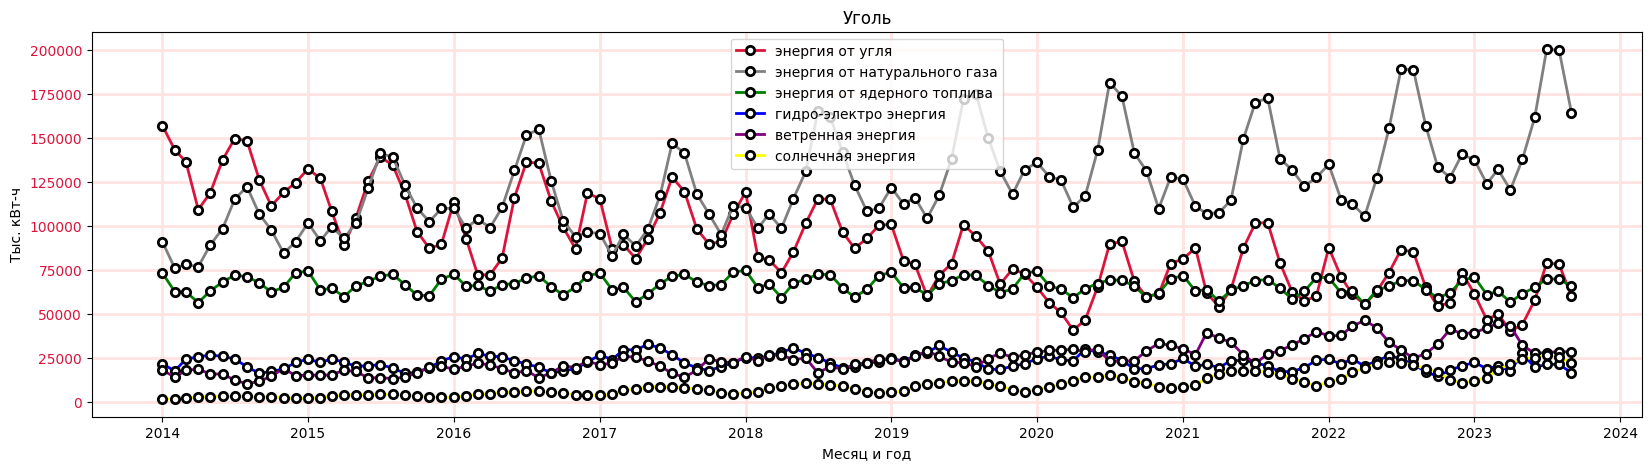

In [49]:
fig, ax1 = plt.subplots(figsize=(20,5))

ax1.plot(
    data['month'], 
    data['coal thousand megawatthours'],
    marker='o',
    label='энергия от угля',
    color='crimson', # - График с линиями и маркерами цвета 'crimson'
    markerfacecolor='white', # - Цвет точек 'white'
    markeredgecolor='black', # - Цвет границ 'black'
    markeredgewidth=2, # - Толщина границ 2
    markersize=6,
    linewidth=2
    )

ax1.plot(
    data['month'], 
    data['natural gas thousand megawatthours'],
    marker='o',
    label='' \
    'энергия от натурального газа',
    color='gray', # - График с линиями и маркерами цвета 'gray'
    markerfacecolor='white', # - Цвет точек 'white'
    markeredgecolor='black', # - Цвет границ 'black'
    markeredgewidth=2, # - Толщина границ 2
    markersize=6,
    linewidth=2
    )

ax1.plot(
    data['month'], 
    data['nuclear thousand megawatthours'],
    marker='o',
    label='энергия от ядерного топлива',
    color='green', # - График с линиями и маркерами цвета 'green'
    markerfacecolor='white', # - Цвет точек 'white'
    markeredgecolor='black', # - Цвет границ 'black'
    markeredgewidth=2, # - Толщина границ 2
    markersize=6,
    linewidth=2
    )

ax1.plot(
    data['month'], 
    data['conventional hydroelectric thousand megawatthours'],
    marker='o',
    label='гидро-электро энергия',
    color='blue', # - График с линиями и маркерами цвета 'blue'
    markerfacecolor='white', # - Цвет точек 'white'
    markeredgecolor='black', # - Цвет границ 'black'
    markeredgewidth=2, # - Толщина границ 2
    markersize=6,
    linewidth=2
    )

ax1.plot(
    data['month'], 
    data['wind thousand megawatthours'],
    marker='o',
    label='ветренная энергия',
    color='purple', # - График с линиями и маркерами цвета 'purple'
    markerfacecolor='white', # - Цвет точек 'white'
    markeredgecolor='black', # - Цвет границ 'black'
    markeredgewidth=2, # - Толщина границ 2
    markersize=6,
    linewidth=2
    )

ax1.plot(
    data['month'], 
    data['all solar thousand megawatthours'],
    marker='o',
    label='солнечная энергия',
    color='yellow', # - График с линиями и маркерами цвета 'yellow'
    markerfacecolor='white', # - Цвет точек 'white'
    markeredgecolor='black', # - Цвет границ 'black'
    markeredgewidth=2, # - Толщина границ 2
    markersize=6,
    linewidth=2
    )


ax1.set_xlabel('Месяц и год')
ax1.set_ylabel('Тыс. кВт-ч')
ax1.tick_params(axis='y', labelcolor='crimson')
ax1.legend(loc='upper center')

ax1.set_title('Уголь')
ax1.grid(True, color='mistyrose', linewidth=2) # - Сетка на графике, цвет 'mistyrose', толщина 2


plt.show()

## Вывод

* Снижение угля как источника энергии и рост газовой генерации.

* Возобновляемые источники (ветер и солнце) начали активно наращивать производство, хотя пока уступают традиционным.

* Ядерная и гидроэнергия остаются стабильными источниками, обеспечивающими «скелет» энергосистемы.

---
## Задание 6
Выполнить визуализацию многомерных данных, используя t-SNE. Необходимо использовать набор данных MNIST или fashion MNIST (можно использовать и другие готовые наборы данных, где можно наблюдать разделение объектов по кластерам). Рассмотреть результаты визуализации для разных значений перплексии.

Время выполнения t-SNE (perplexity=5): 7.38 сек.
Время выполнения t-SNE (perplexity=30): 8.32 сек.
Время выполнения t-SNE (perplexity=50): 11.07 сек.


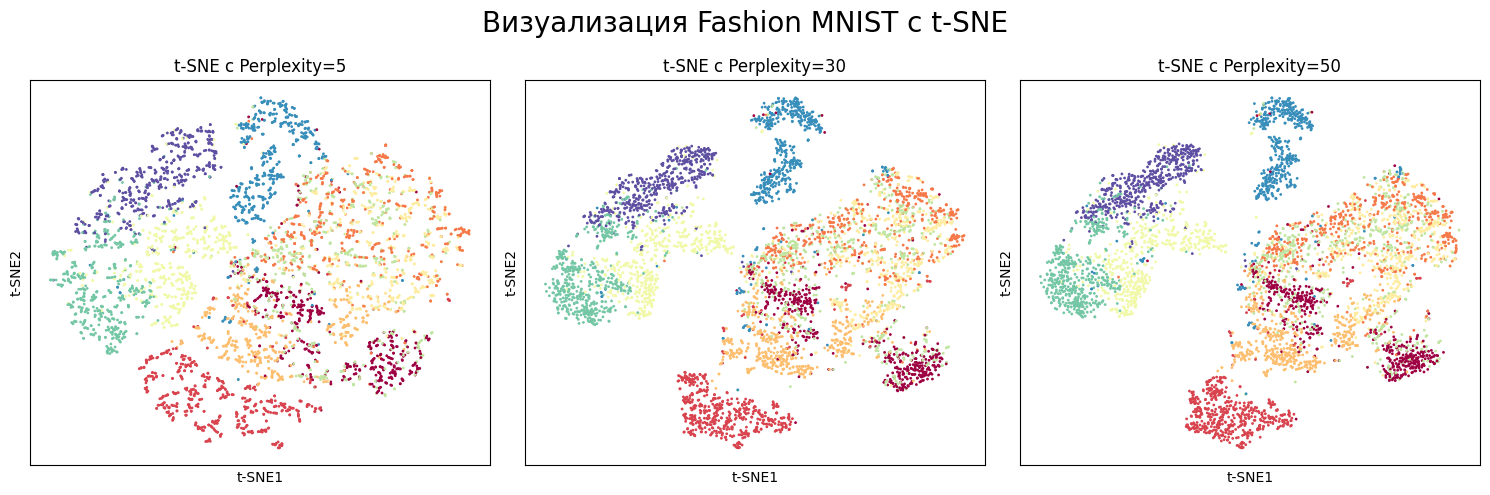

In [ ]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True, as_frame=False)
X = mnist.data[:5000] / 255.0
y = mnist.target[:5000].astype(int)

perplexities = [5, 30, 50]
plt.figure(figsize=(15, 5))

for i, p in enumerate(perplexities):
    tsne_start = time.time()
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    X_tsne = tsne.fit_transform(X)
    tsne_end = time.time()

    ax = plt.subplot(1, len(perplexities), i + 1)
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='Spectral', s=1)
    ax.set_title(f't-SNE с Perplexity={p}')
    ax.set_xlabel('t-SNE1')
    ax.set_ylabel('t-SNE2')
    ax.set_xticks([])
    ax.set_yticks([])
    print(f"Время выполнения t-SNE (perplexity={p}): {tsne_end - tsne_start:.2f} сек.")

plt.suptitle("Визуализация Fashion MNIST с t-SNE", fontsize=20)
plt.tight_layout()
plt.show()

## Вывод

**MNIST (Modified National Institute of Standards and Technology database)** — это один из самых известных наборов данных для машинного обучения. Он содержит изображения рукописных цифр от 0 до 9.

**Fashion MNIST** — это более современный аналог MNIST, созданный компанией Zalando. Он сделан по той же структуре, но вместо цифр содержит изображения предметов одежды: футболки, куртки, обувь и т.д.

**Перплексия** — это гиперпараметр метода t-SNE (t-distributed Stochastic Neighbor Embedding), который используется для визуализации данных высокой размерности (например, изображений MNIST в 2D).

### Что означают эти скопления

Каждое скопление на графике — это визуальное представление одного класса объектов из исходного набора данных. Для датасет Fashion MNIST, эти кластеры соответствуют разным типам одежды.

Алгоритм t-SNE работает, находя сходство между объектами в многомерном пространстве и проецируя это сходство на двухмерный график. Грубо говоря - рядом значит похожи.

### На что влияет плотность

- Высокая плотность:  Это означает, что объекты в кластере очень похожи друг на друга.
- Низная плотность: Если кластер более рыхлый или рассеянный, это говорит о том, что объекты в нем имеют большую внутреннюю вариацию.

---
## Задание 7
Выполнить визуализацию многомерных данных, используя UMAP с различными параметрами n_neighbors и min_dist. Рассчитать время работы алгоритма с помощью библиотеки time и сравнить его с временем работы t-SNE.

f:\Pythonchick\BigData\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Время выполнения UMAP (n_neighbors=5, min_dist=0.1): 15.14 сек.


f:\Pythonchick\BigData\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Время выполнения UMAP (n_neighbors=5, min_dist=0.5): 2.61 сек.


f:\Pythonchick\BigData\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Время выполнения UMAP (n_neighbors=5, min_dist=0.9): 2.63 сек.


f:\Pythonchick\BigData\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Время выполнения UMAP (n_neighbors=30, min_dist=0.1): 7.36 сек.


f:\Pythonchick\BigData\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Время выполнения UMAP (n_neighbors=30, min_dist=0.5): 6.59 сек.


f:\Pythonchick\BigData\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Время выполнения UMAP (n_neighbors=30, min_dist=0.9): 7.09 сек.


f:\Pythonchick\BigData\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Время выполнения UMAP (n_neighbors=50, min_dist=0.1): 16.41 сек.


f:\Pythonchick\BigData\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Время выполнения UMAP (n_neighbors=50, min_dist=0.5): 8.24 сек.


f:\Pythonchick\BigData\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Время выполнения UMAP (n_neighbors=50, min_dist=0.9): 8.28 сек.


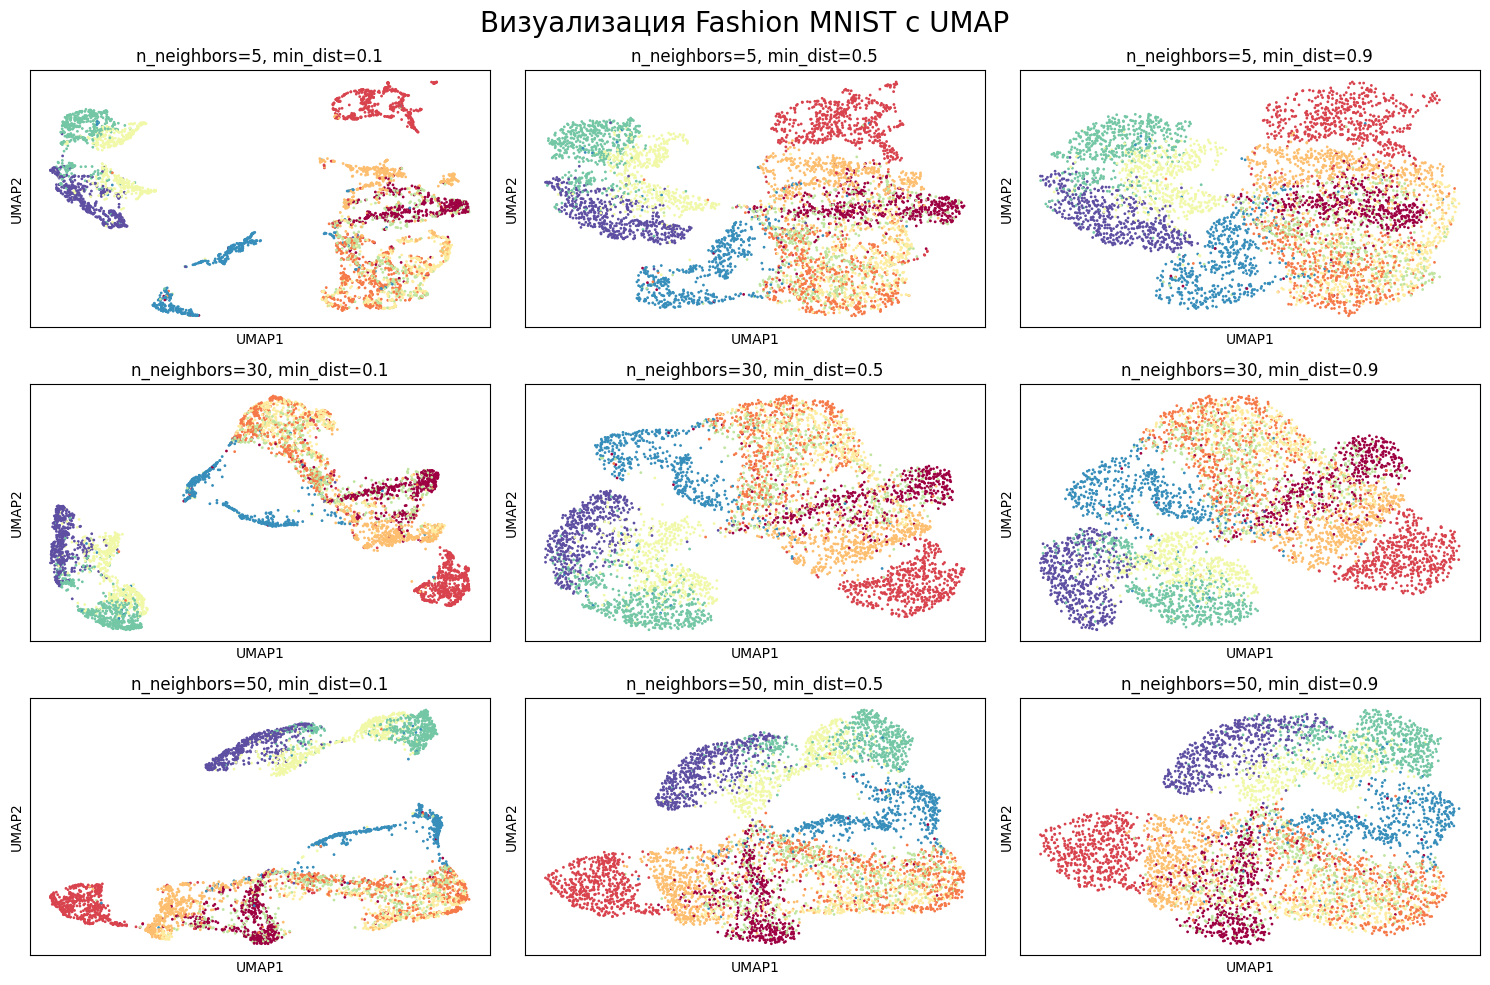

In [55]:
# Визуализация для разных параметров UMAP
n_neighbors_list = [5, 30, 50]
min_dist_list = [0.1, 0.5, 0.9]

plt.figure(figsize=(15, 10))
plot_count = 1

for n_neighbors in n_neighbors_list:
    for min_dist in min_dist_list:
        umap_start = time.time()
        reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
        embedding = reducer.fit_transform(X)
        umap_end = time.time()

        ax = plt.subplot(len(n_neighbors_list), len(min_dist_list), plot_count)
        ax.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='Spectral', s=1)
        ax.set_title(f'n_neighbors={n_neighbors}, min_dist={min_dist}')
        ax.set_xlabel('UMAP1')
        ax.set_ylabel('UMAP2')
        ax.set_xticks([])
        ax.set_yticks([])

        print(f"Время выполнения UMAP (n_neighbors={n_neighbors}, min_dist={min_dist}): {umap_end - umap_start:.2f} сек.")
        plot_count += 1

plt.suptitle("Визуализация Fashion MNIST с UMAP", fontsize=20)
plt.tight_layout()
plt.show()

---
## Вывод

### На что влияют параметры UMAP:

1. **n_neighbors (количество соседей)**: Этот параметр похож на perplexity в t-SNE.

    Низкое значение (n_neighbors=5) приводит к акценту на локальной структуре(меньшее количество соседей), что делает кластеры более раздробленными.

    Высокое значение (n_neighbors=50) делает кластеры более крупными и слитными, так как алгоритм учитывает больше соседей, что лучше отражает глобальную структуру.

2. **min_dist (минимальное расстояние)**: Этот параметр управляет плотностью кластеров.

    Низкое значение (min_dist=0.1) делает кластеры очень плотными и компактными, а высокое (min_dist=0.9) — более разбросанными и рыхлыми.

### Сравнение времени UMAP и t-SNE

Как правило, UMAP работает значительно быстрее t-SNE.
В моем случае так и вышло.

UMAP: в среднем 12-17 секунд

t-SNE: 45-50 секунд

---
# Задание 8

На основе всех выполненных заданий можно сделать следующие выводы:

1. Для первых заданий мы использовали данные о выработке электроэнергии с помощью различных источников. Это позволило эффективно продемонстрировать возможности библиотек Plotly и Matplotlib для работы с различными типами признаков — численными и категориальными.
2. Для заданий 6 и 7 мы переключились на многомерные данные с изображениями. Это был необходимый шаг, так как алгоритмы понижения размерности, такие как t-SNE и UMAP, созданы именно для работы с подобными высокоразмерными наборами.

## Сравнение библиотек

- Plotly отлично подходит для создания интерактивных и готовых к публикации графиков. Он требует меньше кода для получения красивого и динамичного результата.
- Matplotlib — это более гибкая и настраиваемая библиотека. Она позволяет тонко управлять каждым элементом графика, что идеально подходит для глубокого анализа и создания кастомных визуализаций, но часто требует больше кода.
- t-SNE — это мощный инструмент для визуализации кластеров, который хорошо подходит для анализа структуры данных. Однако он медленный и требователен к ресурсам на больших наборах данных.
- UMAP — это более современная и быстрая альтернатива t-SNE. Он сохраняет как локальную, так и глобальную структуру данных, что делает его предпочтительным выбором для больших и сложных датасетов.
